In [2]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataLoader, Blurr, Add_noise
from Codes.alternate import AlternatingBD

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 +  \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

In [3]:
file_name = 'Images'
im_name   = 'image01.png'
x_i = DataLoader(file_name,im_name)
x_i = x_i/np.amax(x_i)# Rescaling

In [4]:
M         = 20
Nx, Ny    = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d         = np.sqrt(Nx*Nx+Ny*Ny)
sigma,moy = 0.1, 0.0
K         = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K         = K/K.sum() # Simplex

In [5]:
x_b  = Blurr(x_i,K)
x_o1 = Add_noise(x_b)

### Initialisation juste - bruit 1%

Image estimation # 0


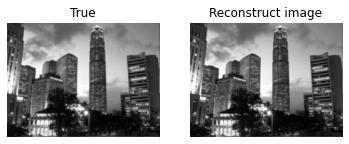

Erreur |x_pred - x_true|_2 : 0.03137475471334937
Kernel estimation # 0


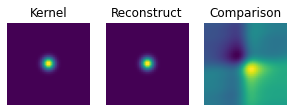

Erreur |K_pred - K_true|_2 : 0.0007426902116989076
Image estimation # 1


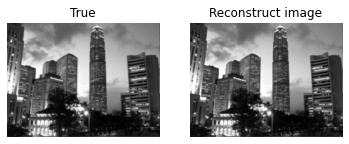

Erreur |x_pred - x_true|_2 : 0.022379955103210253
Kernel estimation # 1


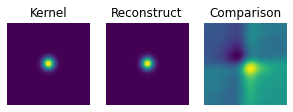

Erreur |K_pred - K_true|_2 : 0.0004771727886348303
Image estimation # 2


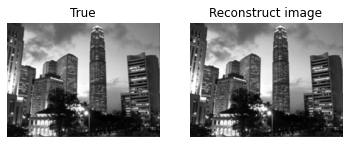

Erreur |x_pred - x_true|_2 : 0.016679664780005814
Kernel estimation # 2


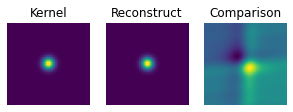

Erreur |K_pred - K_true|_2 : 0.00031567881725230506
Image estimation # 3


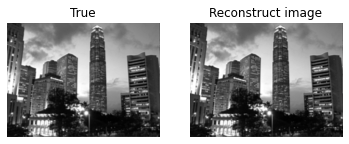

Erreur |x_pred - x_true|_2 : 0.013038270019381695
Kernel estimation # 3


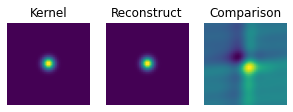

Erreur |K_pred - K_true|_2 : 0.00021699120197080806
Image estimation # 4


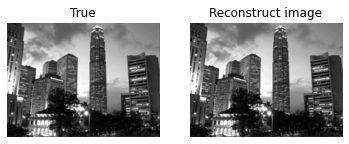

Erreur |x_pred - x_true|_2 : 0.010704034813712165
Kernel estimation # 4


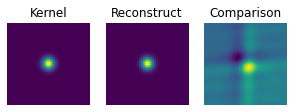

Erreur |K_pred - K_true|_2 : 0.00015674300085646248


In [6]:
alpha = 0.1
mu    = 0.05
K_in   = K.copy()
x_in  = x_o1
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation juste, bruit 0.01')

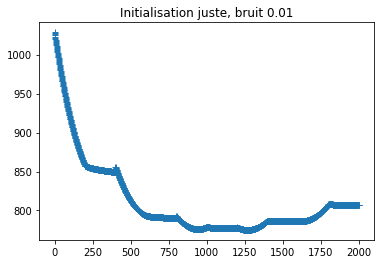

In [7]:
plt.plot(Etot,'+')
plt.title("Initialisation juste, bruit 0.01")

### Initialisation noyau proche - pas de bruit

Image estimation # 0


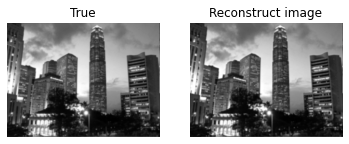

Erreur |x_pred - x_true|_2 : 0.027252395394893384
Kernel estimation # 0


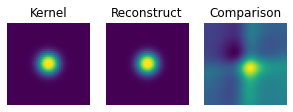

Erreur |K_pred - K_true|_2 : 0.001519348435638093
Image estimation # 1


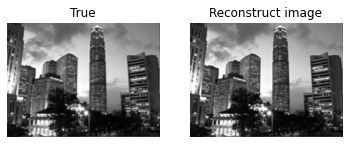

Erreur |x_pred - x_true|_2 : 0.020507634656420838
Kernel estimation # 1


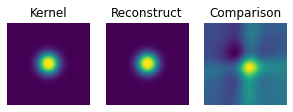

Erreur |K_pred - K_true|_2 : 0.0011409931184162149
Image estimation # 2


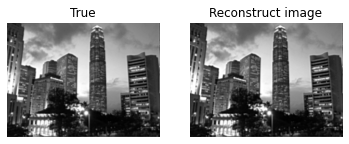

Erreur |x_pred - x_true|_2 : 0.0161497905023725
Kernel estimation # 2


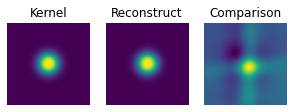

Erreur |K_pred - K_true|_2 : 0.0009153510667106109
Image estimation # 3


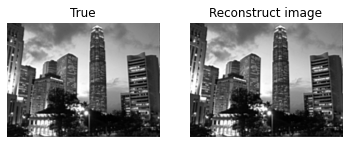

Erreur |x_pred - x_true|_2 : 0.013214222249643491
Kernel estimation # 3


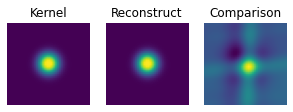

Erreur |K_pred - K_true|_2 : 0.0007784530888015189
Image estimation # 4


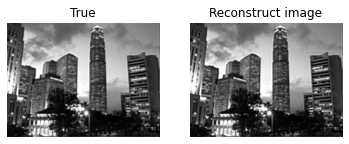

Erreur |x_pred - x_true|_2 : 0.011185502159456955
Kernel estimation # 4


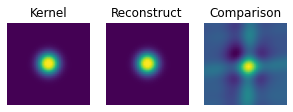

Erreur |K_pred - K_true|_2 : 0.0006923485484248536


In [8]:
alpha     = 0.05
mu        = 0.005
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_b,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, pas de bruit')

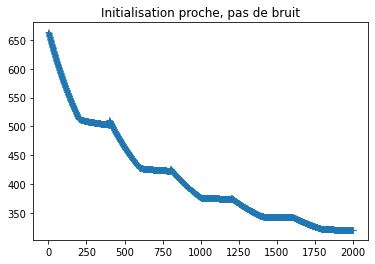

In [9]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, pas de bruit")

### Initialisation proche - bruit 1%

Image estimation # 0


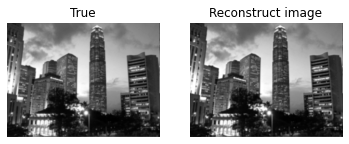

Erreur |x_pred - x_true|_2 : 0.0277174422495538
Kernel estimation # 0


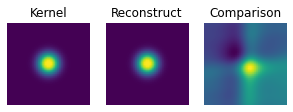

Erreur |K_pred - K_true|_2 : 0.0015207939702999865
Image estimation # 1


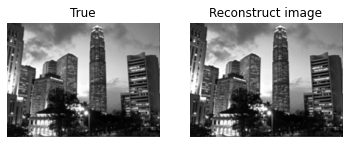

Erreur |x_pred - x_true|_2 : 0.021128299471158823
Kernel estimation # 1


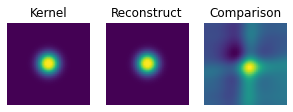

Erreur |K_pred - K_true|_2 : 0.0011436862445639775
Image estimation # 2


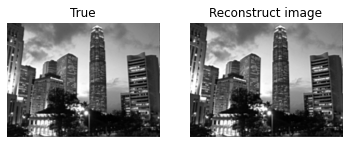

Erreur |x_pred - x_true|_2 : 0.016922148319168048
Kernel estimation # 2


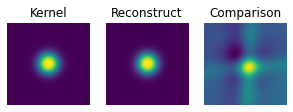

Erreur |K_pred - K_true|_2 : 0.0009195535379887966
Image estimation # 3


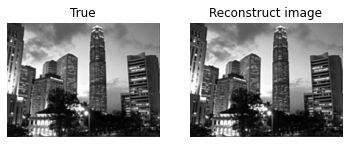

Erreur |x_pred - x_true|_2 : 0.014159866139250594
Kernel estimation # 3


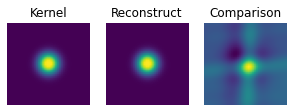

Erreur |K_pred - K_true|_2 : 0.0007845585752858217
Image estimation # 4


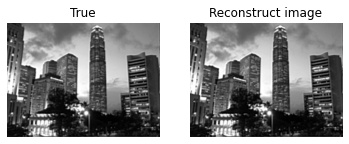

Erreur |x_pred - x_true|_2 : 0.012324171428473356
Kernel estimation # 4


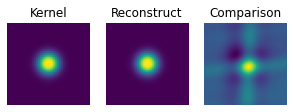

Erreur |K_pred - K_true|_2 : 0.0007007752049509434


In [10]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01')

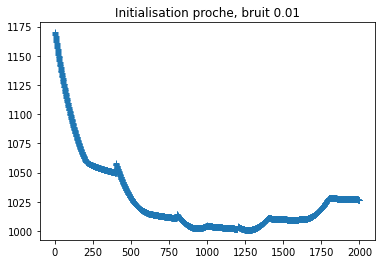

In [11]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01")

### Initialisation proche - bruit 1% - projection sur le simplex

Image estimation # 0


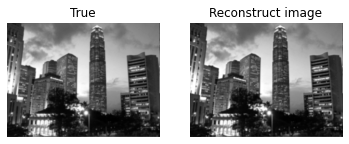

Erreur |x_pred - x_true|_2 : 0.0277174422495538
Kernel estimation # 0


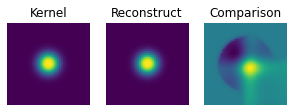

Erreur |K_pred - K_true|_2 : 0.0012969412930083695
Image estimation # 1


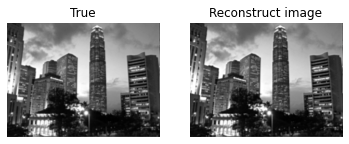

Erreur |x_pred - x_true|_2 : 0.02116879593019238
Kernel estimation # 1


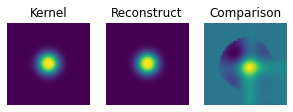

Erreur |K_pred - K_true|_2 : 0.0009926465791728755
Image estimation # 2


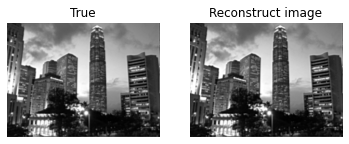

Erreur |x_pred - x_true|_2 : 0.016961529949711982
Kernel estimation # 2


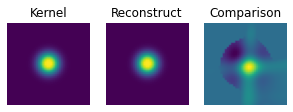

Erreur |K_pred - K_true|_2 : 0.0008257927009917705
Image estimation # 3


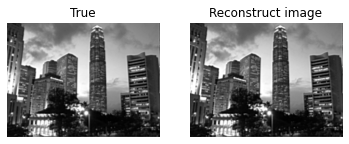

Erreur |x_pred - x_true|_2 : 0.014183706661486016
Kernel estimation # 3


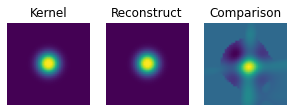

Erreur |K_pred - K_true|_2 : 0.0007218566864510992
Image estimation # 4


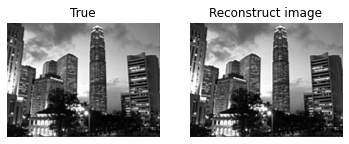

Erreur |x_pred - x_true|_2 : 0.012332474258156118
Kernel estimation # 4


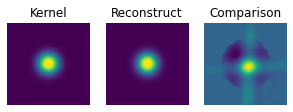

Erreur |K_pred - K_true|_2 : 0.0006529470592345704


In [12]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01, proj sur simplex')

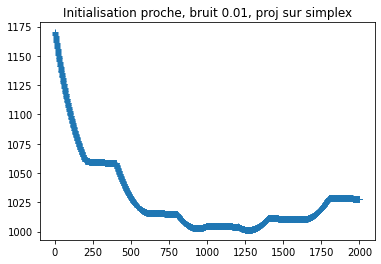

In [13]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

### Initialisation lointaine, bruit 1%, proj sur simplex

Image estimation # 0


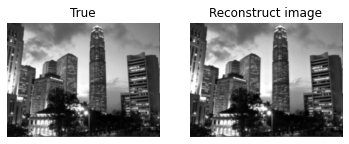

Erreur |x_pred - x_true|_2 : 0.02471188198563917
Kernel estimation # 0


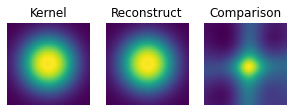

Erreur |K_pred - K_true|_2 : 0.009268240809665148
Image estimation # 1


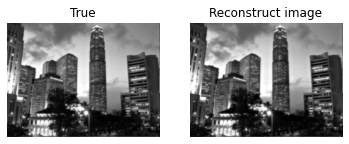

Erreur |x_pred - x_true|_2 : 0.019673190180615367
Kernel estimation # 1


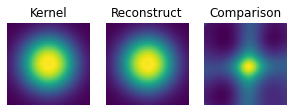

Erreur |K_pred - K_true|_2 : 0.008762416543090538
Image estimation # 2


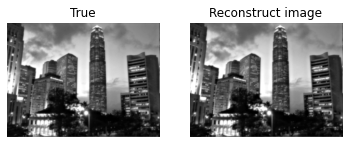

Erreur |x_pred - x_true|_2 : 0.016340308871208683
Kernel estimation # 2


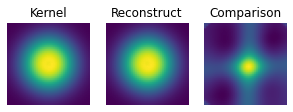

Erreur |K_pred - K_true|_2 : 0.008391764417230526
Image estimation # 3


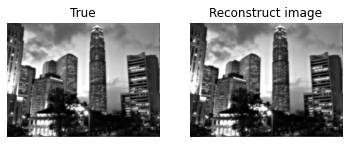

Erreur |x_pred - x_true|_2 : 0.014098050651922763
Kernel estimation # 3


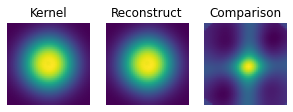

Erreur |K_pred - K_true|_2 : 0.00810586218605692
Image estimation # 4


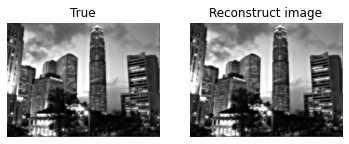

Erreur |x_pred - x_true|_2 : 0.012535920801809647
Kernel estimation # 4


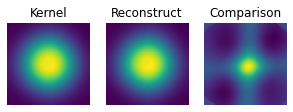

Erreur |K_pred - K_true|_2 : 0.007872883826696037


In [14]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.4, 0.1
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01, proj sur simplex')

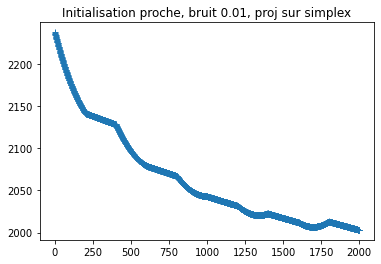

In [15]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")